In [50]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [51]:
import matplotlib.pyplot as plt
import numpy as np

**Part 1: First steps with Sequential models**

In [52]:
# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  

In [53]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.

In [54]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(10, activation='softmax')
])

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9274 - val_loss: 0.2652 - val_accuracy: 0.9256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9282 - val_loss: 0.2668 - val_accuracy: 0.9268
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9293 - val_loss: 0.2654 - val_accuracy: 0.9252
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.9302 - val_loss: 0.2695 - val_accuracy: 0.9252
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2511 - accuracy: 0.9302 - val_loss: 0.2671 - val_accuracy: 0.9264
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9319 - val_loss: 0.2680 - val_accuracy: 0.9243
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2480 - accuracy: 0.9316 - val_loss: 0.2639 - val_accuracy:

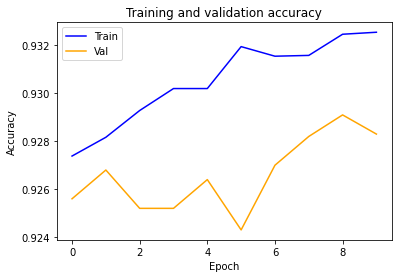

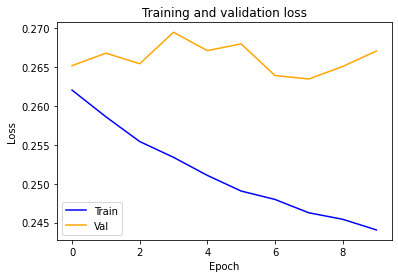

In [57]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))
model.evaluate(x_test, y_test)
plot(history)

In [63]:
#added a dense layer with 128 nodes with activation RELU - Non-Linearity in model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2608 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1150 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0781 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0763 - accuracy: 0.9763


[0.0763288214802742, 0.9763000011444092]

In [61]:
#added a dense layer with 128 nodes with activation RELU - Non-Linearity in model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2412 - accuracy: 0.9299
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1038 - accuracy: 0.9680
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0717 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0571 - accuracy: 0.9817
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9743


[0.09228669106960297, 0.9743000268936157]

CORRECT PREDICTED IMAGES

Correct Label : 7
Predicted Label : 7
Confidence : 0.9986625


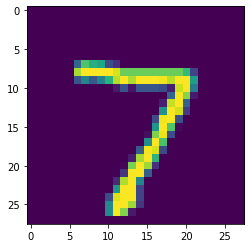

Correct Label : 2
Predicted Label : 2
Confidence : 0.9999764


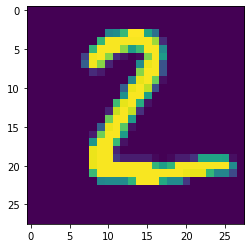

Correct Label : 1
Predicted Label : 1
Confidence : 0.99884605


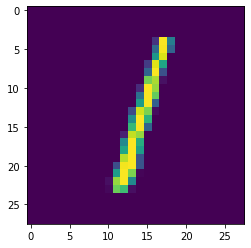

Correct Label : 0
Predicted Label : 0
Confidence : 0.999819


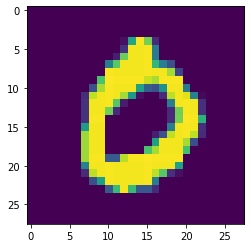


WRONG PREDICTED IMAGES

Correct Label : 4
Predicted Label : 9
Confidence : 0.5880553


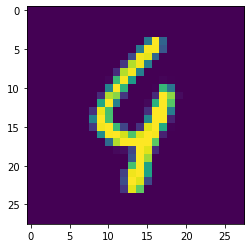

Correct Label : 2
Predicted Label : 9
Confidence : 0.43456513


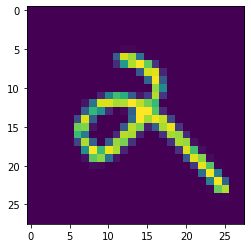

Correct Label : 9
Predicted Label : 8
Confidence : 0.5220296


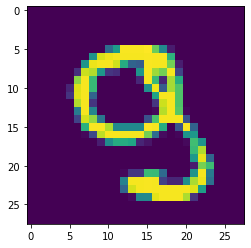

Correct Label : 4
Predicted Label : 2
Confidence : 0.55060464


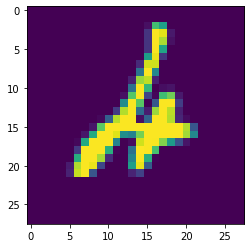

In [73]:
predictions = model.predict(x_test)
count=1

print("CORRECT PREDICTED IMAGES\n")
for i in range(len(x_test)):
  predicted_class = np.argmax(predictions[i])
  if(predicted_class == y_test[i]): #Get an image that has been predicted correctly
    plt.imshow(x_test[i])
    print("Correct Label : " + str(y_test[i]))
    print("Predicted Label : " + str(predicted_class))
    print("Confidence : " + str(np.max(predictions[i])))
    plt.show()
    count=count+1
    if(count==5):
      break;

print("\nWRONG PREDICTED IMAGES\n")
count=1
for i in range(len(x_test)):
  predicted_class = np.argmax(predictions[i])
  if(predicted_class != y_test[i]): #Get an image that has been predicted incorrectly
    plt.imshow(x_test[i])
    print("Correct Label : " + str(y_test[i]))
    print("Predicted Label : " + str(predicted_class))
    print("Confidence : " + str(np.max(predictions[i])))
    plt.show()
    count=count+1
    if(count==5):
      break;    

**Part 2: Subclassed models**

In [74]:
# Download a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)

tf.Tensor(9, shape=(), dtype=uint8)


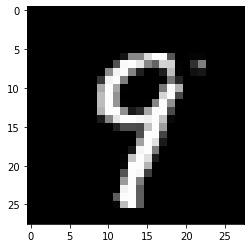

In [90]:
# A quick example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0], plt.get_cmap('gray'))
  print(label[0])

In [93]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model

In [94]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [97]:
model = MyLinearModel()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

for epoch in range(5): # For each epoch
  count=1
  for images, labels in train_ds: # For each batch of images and labels
    count=count+1
    with tf.GradientTape() as tape: # Open a GradientTape.
      predictions = model(images) # Forward pass
      loss = loss_fn(labels, predictions)    # Calculate loss
    gradients = tape.gradient(loss, model.trainable_variables) # Backprop to calculate gradients
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # Gradient descent step

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
  print("Count of Images", count)
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Count of Images 1876
Epoch 0, Test loss: 0.47760340571403503
Count of Images 1876
Epoch 1, Test loss: 0.3982086479663849
Count of Images 1876
Epoch 2, Test loss: 0.36576908826828003
Count of Images 1876
Epoch 3, Test loss: 0.34689846634864807
Count of Images 1876
Epoch 4, Test loss: 0.3345600366592407


**Visualize the learned weights**

In [100]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# TODO: modify this code to get the weights
weights, bias = model.d1.get_weights() # get the weights
print(weights.shape)

(784, 10)


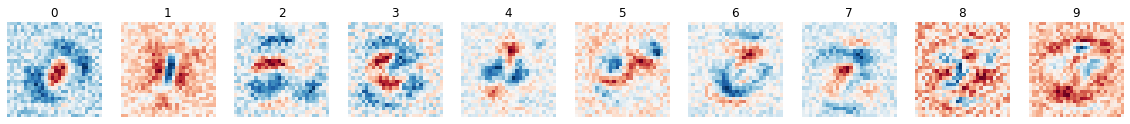

In [107]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # TODO: modify this code to complete the plotting function
  i_weights = weights[:,i] # Select the weights for the i'th output
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('RdBu'))
plt.show()

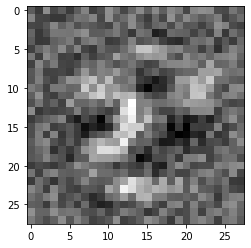

In [116]:
i_weights = weights[:,8]
img = i_weights.reshape(28,28) 
plt.imshow(img, plt.get_cmap('gray'))

**Part 3 :- Deep Neural Network**

In [119]:
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.d1 = Dense(128, activation="relu")
    self.d2 = Dense(64, activation="relu")
    self.d3 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return self.d3(x)


In [120]:
model = MyDNN()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

for epoch in range(5): # For each epoch
  count=1
  for images, labels in train_ds: # For each batch of images and labels
    count=count+1
    with tf.GradientTape() as tape: # Open a GradientTape.
      predictions = model(images) # Forward pass
      loss = loss_fn(labels, predictions)    # Calculate loss
    gradients = tape.gradient(loss, model.trainable_variables) # Backprop to calculate gradients
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # Gradient descent step

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
  print("Count of Images", count)
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Count of Images 1876
Epoch 0, Test loss: 0.3210948705673218
Count of Images 1876
Epoch 1, Test loss: 0.2516337037086487
Count of Images 1876
Epoch 2, Test loss: 0.21782901883125305
Count of Images 1876
Epoch 3, Test loss: 0.19338051974773407
Count of Images 1876
Epoch 4, Test loss: 0.17380915582180023


(784, 128)


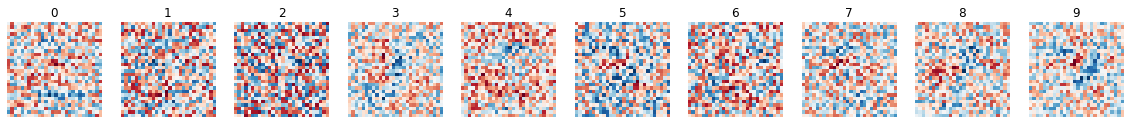

In [122]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# TODO: modify this code to get the weights
weights, bias = model.d1.get_weights() # get the weights
print(weights.shape)
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # TODO: modify this code to complete the plotting function
  i_weights = weights[:,i] # Select the weights for the i'th output
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('RdBu'))
plt.show()

**Neural Network with softmax**

In [126]:
def my_softmax(x):  
  # Write me
  ex = tf.math.exp(x - tf.math.reduce_max(x))
  return ex/tf.math.reduce_sum(ex)
                               
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.d1 = Dense(128, activation="relu")
    self.d2 = Dense(64, activation="relu")
    self.d3 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return my_softmax(x)

In [127]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [128]:
@tf.function #to make execution fast
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
      
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_accuracy(labels, predictions)

In [129]:
@tf.function #to make execution fast
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [130]:
# TODO
# Add code to train this model
# When it's trained, the accuracy should be similar to the linear
# model from part one (but not identical, the weights are initialized randomly)

EPOCHS = 5
for epoch in range(EPOCHS):

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.15288472175598145, Accuracy: 95.44499969482422, Test Loss: 0.11316365003585815, Test Accuracy: 96.68000030517578
Epoch 2, Loss: 0.08614421635866165, Accuracy: 97.32166290283203, Test Loss: 0.09123736619949341, Test Accuracy: 97.19999694824219
Epoch 3, Loss: 0.061516329646110535, Accuracy: 98.07666778564453, Test Loss: 0.08384361118078232, Test Accuracy: 97.63999938964844
Epoch 4, Loss: 0.05040743574500084, Accuracy: 98.38999938964844, Test Loss: 0.09097792208194733, Test Accuracy: 97.31999969482422
Epoch 5, Loss: 0.03705278038978577, Accuracy: 98.79000091552734, Test Loss: 0.08891735225915909, Test Accuracy: 97.56999969482422


(784, 128)


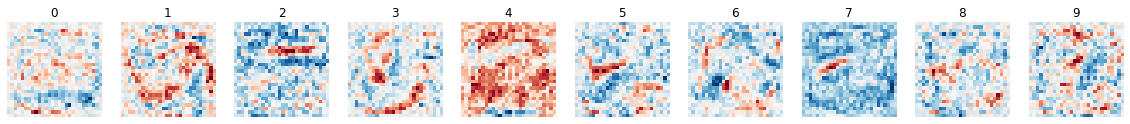

In [131]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# TODO: modify this code to get the weights
weights, bias = model.d1.get_weights() # get the weights
print(weights.shape)
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # TODO: modify this code to complete the plotting function
  i_weights = weights[:,i] # Select the weights for the i'th output
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('RdBu'))
plt.show()